In [1]:
%connect_info


{"key":"886009df-a91f-412d-809a-a84dddd4cee8","signature_scheme":"hmac-sha256","transport":"tcp","ip":"127.0.0.1","hb_port":9015,"control_port":9016,"shell_port":9017,"stdin_port":9018,"iopub_port":9019,"kernel_name":"python3112jvsc74a57bd04149aa2f31a7f8b5ff184e82bf464dce73529b69401cc2940ad6232b832b4da8"}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-v3b08e4b6439608d6fb3d154ccfbab9edcb84e6a3f.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

import mne

In [6]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import hypyp.fnirs
import hypyp.plots
import hypyp.wavelet
from hypyp.wavelet.pywavelets_wavelet import PywaveletsWavelet


The IPython.extensions.autoreload extension is already loaded. To reload it, use:
  %reload_ext IPython.extensions.autoreload


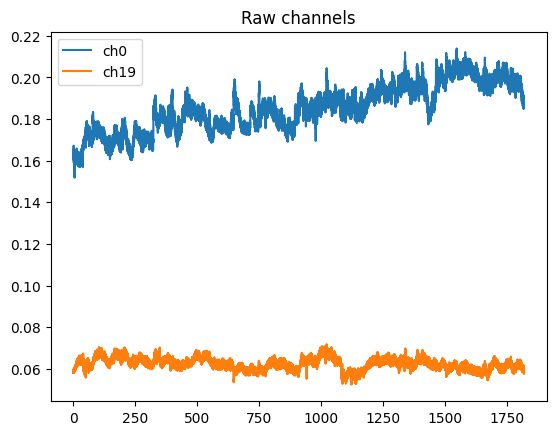

In [7]:
base_path = "/media/patrice/My Passport/DataNIRS/"
filename = "syn_ce05_001.nirs"

file_path = os.path.join(base_path, filename)

mat = scipy.io.loadmat(file_path)

mat.keys()

x = mat['t']
y1 = mat['d'][:,0]
y2 = mat['d'][:,19]
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['ch0', 'ch19'])
plt.title('Raw channels')
plt.show()


Downscaling for display by a factor of 10


<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

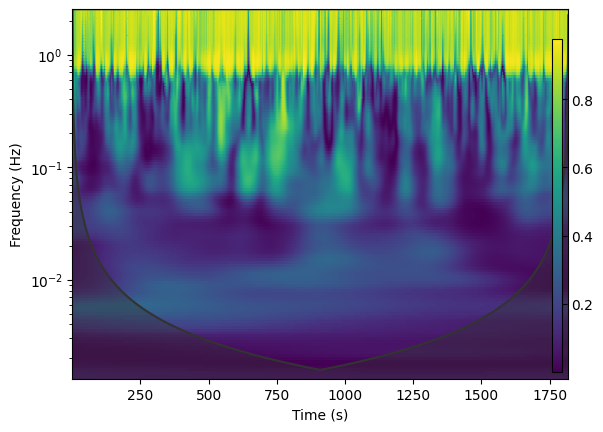

In [ ]:
wa = PywaveletsWavelet()

dt = x[1] - x[0]
res = wa.wtc(y1, y2, dt)

res.plot(downsample=True)
